<h2><font color="3337B0">Le contexte</font></h2>

La trame de données<b><font color="AA33B0"> application_train</font></b> et <b><font color="AA33B0">application_test</font></b> contient le prêt et les demandeurs de prêt.<br> 
La trame de données <b><font color="AA33B0">bureau</font></b>  contient les données d'application d'autres prêts que le client a contractés auprès d'autres établissements de crédit et qui ont été signalés au bureau de crédit.<br>
La trame de données <b><font color="AA33B0">previous_applications</font></b> contient des informations sur les prêts précédents chez <b><font color="AA33B0">Home Credit</font></b> par le même client, des informations sur les prêts précédents et des informations sur le client au moment du prêt (il y a une ligne dans la trame de données par demande de prêt précédente).<br><br>


<h4> <font color="AA33B0">application_{train|test}.csv</h4>

<li>Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).</li>
<li> Des données statiques pour toutes les applications. 
<li> Une ligne représente un prêt dans notre échantillon de données.

<h4><font color="AA33B0">bureau.csv</h4>

<li>Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).</li>
<li>Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

<h4><font color="AA33B0">bureau_balance.csv</h4>

<li>Soldes mensuels des crédits antérieurs au bureau de crédit.</li>
<li>Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) lignes .
    
<h4><font color="AA33B0">POS_CASH_balance.csv</font></h4>

<li>Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.</li>
<li>Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).
    
<h4><font color="AA33B0">credit_card_balance.csv</font></h4>

<li>Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.</li>
<li>Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.
    
<h4><font color="AA33B0">application_précédente.csv</font></h4>

<li>Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.</li>
<li>Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.
    
<h4><font color="AA33B0">versements_paiements.csv</font></h4>

<li>Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.</li>
<li>Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.</li>
<li>Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux prêts de notre échantillon.
    
<h4><font color="AA33B0">AccueilCredit_columns_description.csv</font></h4>

<li>Ce fichier contient les descriptions des colonnes des différents fichiers de données.

<p><font color="283CC6">SK_ID_CURR</font> connecte les dataframes <font color="AA33B0">application_train|test avec bureau, previous_application</font> et aussi avec les dataframes <font color="AA33B0">POS_CASH_balance, versements_payment et credit_card_balance.</font><p> 

<p><font color="283CC6">SK_ID_PREV</font> connecte les dataframes <font color="AA33B0">previous_application avec bureau, previous_application</font> et aussi avec les dataframes <font color="AA33B0">POS_CASH_balance, versements_payment et credit_card_balance.</font><p>    

<p><font color="283CC6">SK_ID_BUREAU</font> connecte le dataframe <font color="AA33B0">bureau</font> avec le dataframe<font color="AA33B0"> bureau_balance.</font>

<h2><b><font color="blue">Problématique</font></b></h2> 

<div class = "alert alert-info alert-info">

Notre objectif ici est de développer un modèle de scoring de la probabilité de défaut de paiement d'un client pour étayer la décision d'accorder ou non un prêt à un client potentiel en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, ...).<br>

Pour cela, nous allons :<br>
<ul>

<li>Traiter le problème de : 'Imbalanced Data'.</li><br> 
<li>Tester des différents modèles de classification en optimisant leurs hyperparamètres.</li><br>
<li>Evaluer les performances des modèles en se basant sur des scores de classification.</li><br>
<li>Construire une métrique Monétaire / Bancaire en pénalisant le défaut.</li><br>
<li>Optimiser le seuil de décision ( le seuil de solvabilité ).</li><br>
<li>Sélectioner des caractéristiques de modèle (feature importance).</li><br>
    
</ul>


<h2><font color="3337B0">Importons les modules nécessaires</font></h2>

In [2]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

## Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline, Pipeline

from collections import Counter

##Split
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold

## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from scipy.stats import uniform as sp_randint
from scipy.stats import uniform as sp_randFloat



from zipfile import ZipFile

## Scores
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, f1_score, precision_score
from sklearn.metrics import fbeta_score, classification_report
from sklearn.metrics import precision_recall_fscore_support

import scikitplot as skplt

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve, cross_validate

from sklearn.feature_selection import RFECV

## feature importance
import shap

## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Export
import pickle
import re
import time

## Warning
import warnings
warnings.filterwarnings("ignore")


%pylab inline

<h2><font color="3337B0">Chargeons le dataset résultant</font></h2>

In [4]:
dataset = pd.read_csv('df_final_projet_7_prepro.csv')

In [5]:
dataset.shape

(307511, 43)

In [6]:
dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
0,100002,1,Cash loans,M,0,202500.0,406597.5,Unaccompanied,working,low_educ,...,-606.000000,24.000000,365243.0,-25.000000,-17.000000,Approved,XAP,New,15.000000,0.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,Family,working,high_educ,...,-1305.000000,10.000000,365243.0,-1054.333333,-1047.333333,Approved,XAP,Refreshed,4.909091,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,Unaccompanied,working,low_educ,...,-815.000000,4.000000,365243.0,-724.000000,-714.000000,Approved,XAP,New,0.000000,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,Unaccompanied,working,low_educ,...,-272.444444,23.000000,365243.0,182477.500000,182481.750000,Approved,XAP,Repeater,8.650000,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,Unaccompanied,working,low_educ,...,-1222.833333,20.666667,365243.0,72136.200000,72143.800000,Approved,XAP,Repeater,11.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,Unaccompanied,working,low_educ,...,-273.000000,8.000000,365243.0,-30.000000,-25.000000,Approved,XAP,New,4.375000,0.0
307507,456252,0,Cash loans,F,0,72000.0,269550.0,Unaccompanied,working,low_educ,...,-2497.000000,6.000000,365243.0,-2316.000000,-2311.000000,Approved,XAP,New,NaN,NaN
307508,456253,0,Cash loans,F,0,153000.0,677664.0,Unaccompanied,working,high_educ,...,-2380.000000,5.000000,365243.0,-2219.000000,-2212.500000,Approved,XAP,Refreshed,NaN,NaN
307509,456254,1,Cash loans,F,0,171000.0,370107.0,Unaccompanied,working,low_educ,...,-299.500000,15.000000,365243.0,365243.000000,365243.000000,Approved,XAP,Repeater,10.350000,0.0


In [7]:
train_len = dataset.shape[0]

In [8]:
train_dataset = dataset[:train_len]
train_ids = train_dataset['SK_ID_CURR']
train_dataset.drop(columns=['SK_ID_CURR'], axis = 1, inplace=True)

In [9]:
# separate training data
train_dataset['TARGET'] = train_dataset['TARGET'].astype(int)
target = train_dataset['TARGET']
features = train_dataset.drop(columns=['TARGET'], axis = 1)
print('x_train data shape: ', features.shape)
print('y_train data shape: ', target.shape)

x_train data shape:  (307511, 41)
y_train data shape:  (307511,)


In [10]:
target_sample = target
target_sample.shape

(307511,)

In [11]:
features_sample = features
features_sample.shape

(307511, 41)

<h2><font color="3337B0">Preprocessing</font></h2>

<div class = "alert alert-info alert-info">
Le prétraitement des données est le suivant:<br>

<ul>       
<li>Fractionnement du jeu de données (40% test set).</li>
<li>Définir les attributs (numériques , catégoriques ...)</li>
<li>Compléter les données manquantes (Imputation)</li>
</ul>    
 
Les variables numériques : Médiane (car variables asymétriques). Les variables catégoriques : le plus fréquent.<br>

<ul>   
<li>Mise à l'échelle des fonctionnalités (Robust scaler(plus fiable vis à vis des outliers)).</li>
<li>Encodage des données catégorielles.</li>
</ul>

In [12]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(features_sample, target_sample, test_size = 0.4)

In [13]:
# Define categorical columns
categoric_attribute = list(features_sample.select_dtypes(exclude=["number"]).columns)
# Define numerical columns
numeric_attribute = list(features_sample.select_dtypes(exclude=["bool_","object_"]).columns)

In [14]:
# Pipeline data transformation (Imputation / Scaling / Encoding):
def Preprocessing (numeric,categoric):
    numeric_transfs = [('imputer',SimpleImputer(missing_values= np.NAN, strategy= 'median')),('scaler', RobustScaler())]
    numeric_pipeline = Pipeline(numeric_transfs)
    categoric_transfs = [('imputer',SimpleImputer(strategy="most_frequent")),('encoding', OneHotEncoder(dtype=np.int,sparse=True,handle_unknown='ignore'))]
    categoric_pipeline = Pipeline(categoric_transfs)
    all_transfs = [("numeric",numeric_pipeline,numeric),("categorical",categoric_pipeline,categoric)]
    full_preprocessor = ColumnTransformer(all_transfs, remainder='passthrough')
    return full_preprocessor

In [15]:
# Data Transformée
preprocessor_fitted = Preprocessing(numeric_attribute,categoric_attribute).fit(X_train)
X_train_transformed = preprocessor_fitted.transform(X_train)
X_test_transformed = preprocessor_fitted.transform(X_test)

In [16]:
## Split into holdout for purposes of imputation and encoding
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=2019)
# class_labels = df['segment_label'].cat.categories

## Preprocessing pipeline

# Define transforms on numeric types
#numeric_features = X.select_dtypes(np.number).columns
'''numeric_features = list(features_sample.select_dtypes(exclude=["bool_","object_"]).columns)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values= np.NAN,strategy='median')),
    ('scaler', RobustScaler())])

# Define transforms on categorical types
#categorical_features = X.select_dtypes(['object', 'bool', 'category']).columns
categorical_features = list(features_sample.select_dtypes(exclude=["number"]).columns)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=True,handle_unknown='ignore'))])

# Construct ColumnTransformer object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough',
    verbose=True)

# Visual inspection of transformed dataframe before CV
preprocessor.fit_transform(X_train, y_train)
enc_cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names()
labels = np.concatenate([numeric_features, enc_cat_features])
transformed_df_columns = pd.DataFrame(preprocessor.transform(X_train).toarray(), columns=labels).columns
print(transformed_df_columns)'''

'numeric_features = list(features_sample.select_dtypes(exclude=["bool_","object_"]).columns)\nnumeric_transformer = Pipeline(steps=[\n    (\'imputer\', SimpleImputer(missing_values= np.NAN,strategy=\'median\')),\n    (\'scaler\', RobustScaler())])\n\n# Define transforms on categorical types\n#categorical_features = X.select_dtypes([\'object\', \'bool\', \'category\']).columns\ncategorical_features = list(features_sample.select_dtypes(exclude=["number"]).columns)\ncategorical_transformer = Pipeline(steps=[\n    (\'imputer\', SimpleImputer(strategy=\'most_frequent\', fill_value=\'missing\')),\n    (\'onehot\', OneHotEncoder(sparse=True,handle_unknown=\'ignore\'))])\n\n# Construct ColumnTransformer object\npreprocessor = ColumnTransformer(\n    transformers=[\n        (\'num\', numeric_transformer, numeric_features),\n        (\'cat\', categorical_transformer, categorical_features)\n    ],\n    remainder=\'passthrough\',\n    verbose=True)\n\n# Visual inspection of transformed dataframe b

In [17]:
'''preprocessor_fitted = Preprocessing(numeric_attribute,categoric_attribute).fit(X_train)
ZX_train_transformed = preprocessor_fitted.transform(X_train)
ZX_test_transformed = preprocessor_fitted.transform(X_test)'''

'preprocessor_fitted = Preprocessing(numeric_attribute,categoric_attribute).fit(X_train)\nZX_train_transformed = preprocessor_fitted.transform(X_train)\nZX_test_transformed = preprocessor_fitted.transform(X_test)'

In [18]:
X_train_transformed

array([[ 0.        , -0.6       , -0.31510443, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.4       ,  0.29976608, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        , -0.1       ,  0.79600668, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.        , -0.65      , -0.11794486, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  1.4       ,  0.78808688, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -1.06      , -0.49430242, ...,  0.        ,
         1.        ,  0.        ]])

In [19]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [20]:
categoric_attribute

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'CREDIT_ACTIVE',
 'NAME_CONTRACT_STATUS',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE']

In [21]:

columns_transf_names = get_feature_names(preprocessor_fitted)
columns_transf_names

['numeric__CNT_CHILDREN',
 'numeric__AMT_INCOME_TOTAL',
 'numeric__AMT_CREDIT_x',
 'numeric__REGION_POPULATION_RELATIVE',
 'numeric__DAYS_BIRTH',
 'numeric__DAYS_EMPLOYED',
 'numeric__CNT_FAM_MEMBERS',
 'numeric__REGION_RATING_CLIENT',
 'numeric__REGION_RATING_CLIENT_W_CITY',
 'numeric__HOUR_APPR_PROCESS_START',
 'numeric__REG_CITY_NOT_WORK_CITY',
 'numeric__DEF_30_CNT_SOCIAL_CIRCLE',
 'numeric__FLAG_DOCUMENT_3',
 'numeric__DAYS_CREDIT',
 'numeric__AMT_CREDIT_SUM',
 'numeric__AMT_BALANCE',
 'numeric__AMT_PAYMENT_CURRENT',
 'numeric__SK_DPD_x',
 'numeric__SK_DPD_DEF',
 'numeric__DAYS_INSTALMENT_delay',
 'numeric__AMT_INSTALMENT_delta',
 'numeric__AMT_ANNUITY',
 'numeric__AMT_CREDIT_y',
 'numeric__AMT_DOWN_PAYMENT',
 'numeric__DAYS_DECISION',
 'numeric__CNT_PAYMENT',
 'numeric__DAYS_FIRST_DRAWING',
 'numeric__DAYS_LAST_DUE',
 'numeric__DAYS_TERMINATION',
 'numeric__CNT_INSTALMENT_FUTURE',
 'numeric__SK_DPD_y',
 'encoding__x0_Cash loans',
 'encoding__x0_Revolving loans',
 'encoding__x1_F'

In [22]:
columns_transf_names_bis = [ mot.replace('numeric__',"") for mot in [ mot.replace('encoding__x',"") for mot in columns_transf_names]]
columns_transf_names_bis

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'DAYS_CREDIT',
 'AMT_CREDIT_SUM',
 'AMT_BALANCE',
 'AMT_PAYMENT_CURRENT',
 'SK_DPD_x',
 'SK_DPD_DEF',
 'DAYS_INSTALMENT_delay',
 'AMT_INSTALMENT_delta',
 'AMT_ANNUITY',
 'AMT_CREDIT_y',
 'AMT_DOWN_PAYMENT',
 'DAYS_DECISION',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'CNT_INSTALMENT_FUTURE',
 'SK_DPD_y',
 '0_Cash loans',
 '0_Revolving loans',
 '1_F',
 '1_M',
 '1_XNA',
 '2_Children',
 '2_Family',
 '2_Group of people',
 '2_Other_A',
 '2_Other_B',
 '2_Spouse, partner',
 '2_Unaccompanied',
 '3_not_working',
 '3_working',
 '4_high_educ',
 '4_low_educ',
 '5_married',
 '5_not_married',
 '5_other',
 '6_Active',
 '6_Closed',
 '6_Sold',
 '7_Approved',
 '7_Canceled'

In [23]:
columns_transf_names =[]
for mot in columns_transf_names_bis:
    if mot[0].isalpha():
        columns_transf_names.append(mot)
    if mot[0].isdigit():
        moto = mot.replace(mot[0],categoric_attribute[int(mot[0])])
        columns_transf_names.append(moto)

columns_transf_names

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'DAYS_CREDIT',
 'AMT_CREDIT_SUM',
 'AMT_BALANCE',
 'AMT_PAYMENT_CURRENT',
 'SK_DPD_x',
 'SK_DPD_DEF',
 'DAYS_INSTALMENT_delay',
 'AMT_INSTALMENT_delta',
 'AMT_ANNUITY',
 'AMT_CREDIT_y',
 'AMT_DOWN_PAYMENT',
 'DAYS_DECISION',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'CNT_INSTALMENT_FUTURE',
 'SK_DPD_y',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INC

In [24]:

X_train_transformed =pd.DataFrame(data =X_train_transformed, columns=columns_transf_names)
#ZX_train_transformed = ZX_train_transformed[X_train.columns]
X_train_transformed

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,...,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA
0,0.0,-0.60,-0.315104,0.908077,0.090185,0.159321,0.0,0.0,0.0,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.40,0.299766,0.013453,-0.750583,148.179943,0.0,0.0,0.0,1.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,-0.10,0.796007,0.000000,-0.111187,-1.360696,1.0,0.0,0.0,-1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.90,0.299766,-0.900895,-1.056005,148.179943,-1.0,1.0,1.0,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-0.60,-0.092648,-0.422576,-0.845161,148.179943,0.0,0.0,0.0,-0.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184501,0.0,1.00,0.557895,0.908077,-0.986960,-0.635665,0.0,0.0,0.0,1.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
184502,3.0,1.25,0.299766,-0.672402,0.338916,-1.412455,3.0,1.0,1.0,-1.25,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
184503,1.0,-0.65,-0.117945,0.202337,0.820316,-0.400728,1.0,0.0,0.0,-0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
184504,0.0,1.40,0.788087,-0.459559,-0.460398,-0.744440,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [25]:
X_test_transformed =pd.DataFrame(data =X_test_transformed, columns=columns_transf_names)
#ZX_train_transformed = ZX_train_transformed[X_train.columns]
X_test_transformed

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,...,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA
0,0.0,1.15,0.234937,0.074824,-0.404530,-0.240194,-1.0,1.0,1.0,-1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.80,0.087502,-0.466474,-0.922306,148.179943,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.90,1.344144,0.638098,-0.453672,-2.560453,0.0,0.0,0.0,-0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.65,0.321579,-0.628718,-0.137817,0.291953,-1.0,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,3.00,0.717477,0.908077,0.757310,0.358674,0.0,0.0,0.0,1.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123000,1.0,-0.60,-0.830426,-0.634078,0.564997,-1.072382,1.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
123001,2.0,0.05,0.796007,0.099855,-0.010158,0.330368,2.0,1.0,1.0,-0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
123002,1.0,-0.35,-0.535656,0.404245,-0.162663,0.136676,1.0,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
123003,1.0,-0.60,-0.368571,0.404245,0.231984,-0.947432,1.0,0.0,0.0,-0.25,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<h2><font color="3337B0">Nouvel échantillonnage</font></h2>

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    
    
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    plt.title(model)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    plt.title(model)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
   


In [28]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
%%time
lr = LogisticRegression(C = 0.0001, max_iter=100)
lr.fit(X_train_transformed, y_train)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test_transformed)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lr.predict(X_test_transformed)))

AUC : 0.5613
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    113074
           1       0.08      0.01      0.02      9931

    accuracy                           0.91    123005
   macro avg       0.50      0.50      0.49    123005
weighted avg       0.85      0.91      0.88    123005

Wall time: 5.61 s


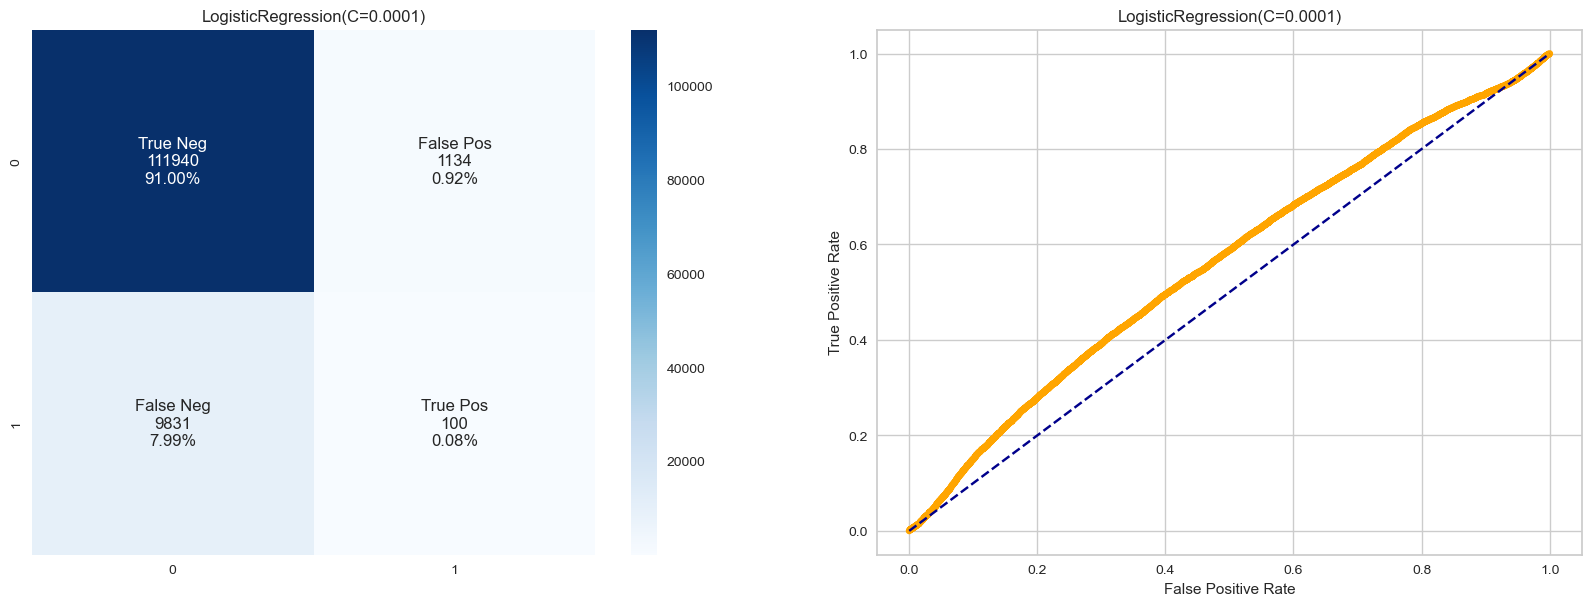

In [30]:
cf_matrix_roc_auc(lr, y_test, lr.predict(X_test_transformed), lr.predict_proba(X_test_transformed)[:,1])

<div class = "alert alert-info alert-info">
<ul>
<li>Le sous-échantillonnage aléatoire (random undersampling) des observations majoritaires : on retire aléatoirement des observations majoritaires</li>
<li>Le sur-échantillonnage aléatoire (random oversampling) des observations minoritaires : on tire au hasard des individus minoritaires que l’on rajoute aux données.</li>
<li>Le sur-échantillonnage synthétique (SMOTE pour Synthetic Minority Oversampling Technique) produit des observations minoritaires ressemblantes mais distinctes de celles déjà existantes.</li>
</ul>
L'idée est de combiner SMOTE avec une technique de sous-échantillonnage (ENN, Tomek) pour augmenter l'efficacité de la gestion de la classe déséquilibrée.

In [31]:
# définisson la stratégie SMOTE
sm = SMOTE(random_state=42)
# Define SMOTE-Tomek Links (Over-sampling followed by under-sampling)
smtomek=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [32]:
def resampling (features, target, resample):
    print('Original dataset shape %s' % Counter(target))
    X, y = resample.fit_resample(features, target)
    print('Resampled dataset shape %s' % Counter(y))
    return X, y

In [33]:
#X_train_sm,y_train_sm = resampling (X_train_transformed, y_train, sm)

In [34]:
%%time
X_train_smtomek,y_train_smtomek = resampling (X_train_transformed, y_train, smtomek)

Original dataset shape Counter({0: 169612, 1: 14894})
Resampled dataset shape Counter({1: 169612, 0: 166027})
Wall time: 42min 31s


In [35]:
%%time
X_test_smtomek,y_test_smtomek = resampling(X_test_transformed, y_test, smtomek)

Original dataset shape Counter({0: 113074, 1: 9931})
Resampled dataset shape Counter({1: 113074, 0: 110294})
Wall time: 18min 25s


In [36]:
'''%%time
X_train_smtomek,y_train_smtomek = resampling (X_train_transformed, y_train, smtomek)'''

'%%time\nX_train_smtomek,y_train_smtomek = resampling (X_train_transformed, y_train, smtomek)'

In [37]:
'''%%time
X_test_smtomek,y_test_smtomek = resampling(X_test_transformed, y_test, smtomek)'''

'%%time\nX_test_smtomek,y_test_smtomek = resampling(X_test_transformed, y_test, smtomek)'

In [38]:
%%time
pd.DataFrame(X_train_smtomek).to_csv('X_train_smtomek.csv',index=False)
pd.DataFrame(y_train_smtomek).to_csv('y_train_smtomek.csv',index=False)
pd.DataFrame(X_test_smtomek).to_csv('X_test_smtomek.csv',index=False)
pd.DataFrame(y_test_smtomek).to_csv('y_test_smtomek.csv',index=False)

Wall time: 41.4 s


In [39]:
%%time
X_train_1 = pd.read_csv('X_train_smtomek.csv' )
y_train_1 = pd.read_csv('y_train_smtomek.csv' )
X_test_1 = pd.read_csv('X_test_smtomek.csv' )
y_test_1 = pd.read_csv('y_test_smtomek.csv' )

Wall time: 7.92 s


In [40]:
print('Taille de X_train_1  : ',X_train_1.shape)
print('Taille de y_train_1  : ',y_train_1.shape)
print('Taille de X_test_1   : ',X_test_1.shape)
print('Taille de y_test_1   : ',y_test_1.shape)

Taille de X_train_1  :  (335639, 70)
Taille de y_train_1  :  (335639, 1)
Taille de X_test_1   :  (223368, 70)
Taille de y_test_1   :  (223368, 1)


In [41]:
999

999

<h2><font color="3337B0">Modélisation</font></h2>

# mod SABINE

In [29]:
'''
def model_optimisation (classifier, param_grid, scoring, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,scoring=scoring, cv=cv)
    grid_search.fit(X, y)
    return grid_search.best_score_,grid_search.best_params_,grid_search.best_estimator_

In [30]:
### Random forest
'''
n_estimators = [140,150,160]
max_depth = range(2,5)
criterions = ['gini', 'entropy']
rf_parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions}
RFC = RandomForestClassifier(max_features='auto')
scorers = {
    'roc_auc':'roc_auc',
    'bank_score': make_scorer(bank_score)
}

NameError: name 'bank_score' is not defined

In [ ]:
### Light GBM
'''light_gbm_params = {
        'max_depth': (6, 10),
        'num_leaves':(15, 20),
        #'min_data_in_leaf': (230, 250),
               }
#score = 'precision_recall_fscore_support'
LGBM = lgb.LGBMClassifier(random_state=0, n_estimators=3000)
scorers = {
    'roc_auc':'roc_auc',
    'bank_score': make_scorer(bank_score)
}

In [49]:
#  NON  NON
'''
weights=(np.linspace(10.0, 20.0, num = 3,dtype= float)) 

LOGREG_rand_params= [{'max_iter':sp_randint(500, 5000),
                      'C': np.logspace(-4, 4, 20),
                      'class_weight': [{0:1, 1:20}]   # 13=>0.38 ; 20=> 0.44      
                     }]
    
RFC_rand_params= [{'n_estimators' :[100,500],
                   'max_depth':[3,5,None],
                   'max_features':sp_randint(1,3),
                   'criterion':['gini'], # ,'entropy'   # Cost function
                   'bootstrap':[True,False],
                   'min_samples_leaf':sp_randint(1,4),
                   'class_weight': [{0:1, 1:20}]
                  }]

XXX_LGBM_rand_params=[{'nthread':[2,6],
                   'n_estimators':[300,700,1000],
                   'learning_rate':sp_randFloat(0.02,0.2),
                   'num_leaves':[30,35],
                   'max_depth':[5,10,15],
                   'min_child_weight':[35,40],
                   'scale_pos_weight': {0:1, 1:20}
                  }]
            
LGBM_rand_params={'n_estimators':[300,700],
                   'max_depth': (6, 10),
                    'num_leaves':(15, 20)}
        
Dummy_rand_params= [{'strategy':['stratified']               
    
    
#XGBC_rand_params= [{'n_estimators':sp_randint(100, 500,1000),
#                    'learning_rate':sp_randFloat(0.05,0.1),
#                    'max_depth':sp_randint(5, 20),
#                    'scale_pos_weight': weights, #for x in weights],
#                    'objective':['binary:logistic']
#                  }]'''



"\nweights=(np.linspace(10.0, 20.0, num = 3,dtype= float)) \n\nLOGREG_rand_params= [{'max_iter':sp_randint(500, 5000),\n                      'C': np.logspace(-4, 4, 20),\n                      'class_weight': [{0:1, 1:20}]   # 13=>0.38 ; 20=> 0.44      \n                     }]\n    \nRFC_rand_params= [{'n_estimators' :[100,500],\n                   'max_depth':[3,5,None],\n                   'max_features':sp_randint(1,3),\n                   'criterion':['gini'], # ,'entropy'   # Cost function\n                   'bootstrap':[True,False],\n                   'min_samples_leaf':sp_randint(1,4),\n                   'class_weight': [{0:1, 1:20}]\n                  }]\n\nXXX_LGBM_rand_params=[{'nthread':[2,6],\n                   'n_estimators':[300,700,1000],\n                   'learning_rate':sp_randFloat(0.02,0.2),\n                   'num_leaves':[30,35],\n                   'max_depth':[5,10,15],\n                   'min_child_weight':[35,40],\n                   'scale_pos_weight

# mod AHAMEG

In [42]:
#   Instanciation des différents modèles 

LOGREG_clf = LogisticRegression() # solver='lbfgs', max_iter=500
DUMMY_clf = DummyClassifier()
RFC_clf= RandomForestClassifier()
LGBM_clf=LGBMClassifier()



XXX_RFC_clf= RandomForestClassifier(max_features='sqrt')
XXX_LGBM_clf=LGBMClassifier(random_state=42, n_estimators=3000)



estimators = [("DummyClassifier", DUMMY_clf),    
              
              ("RandomForestClassifier", RFC_clf),               
              ("LogisticRegression", LOGREG_clf) ,
              ("LightGBM",LGBM_clf) ]


In [43]:
# Hyperparametres utilisés pour RandomizedSearchCV 
weights=(np.linspace(10.0, 20.0, num = 3,dtype= float)) 

LOGREG_rand_params= [{'max_iter':[600],
                      'C': np.logspace(-4, 4, 20),
                      'class_weight': [{0:1, 1:20}]   # 13=>0.38 ; 20=> 0.44      
                     }]
    
RFC_rand_params = {'n_estimators':[140,150,160],
              'max_depth':range(2,5),
              'criterion': ['gini', 'entropy']}



LGBM_rand_params = {'n_estimators':[300,700],
                    'max_depth': (6, 10),
                    'num_leaves':(15, 20)}
        
Dummy_rand_params= {'strategy':['stratified'] }  
    
    
    
XXXRFC_rand_params= [{'n_estimators' :[100],
                   'max_depth':[5],
                   'max_features':[3],
                   'criterion':['gini'], # ,'entropy'   # Cost function
                   'bootstrap':[True,False],
                   'min_samples_leaf':[4],
                   'class_weight': [{0:1, 1:20}]
                  }]

XXX_LGBM_rand_params=[{'nthread':[2,6],
                   'n_estimators':[300,700,1000],
                   'learning_rate':sp_randFloat(0.02,0.2),
                   'num_leaves':[30,35],
                   'max_depth':[5,10,15],
                   'min_child_weight':[35,40],
                   'scale_pos_weight': {0:1, 1:20}
                  }]  

    

                    

In [44]:
# Liste des Hyperparametres utilisés pour RandomizedSearchCV 
params_list_RndSearchCV =  {'DummyClassifier': Dummy_rand_params,
                            'LightGBM':LGBM_rand_params,
                            'RandomForestClassifier': RFC_rand_params,
                            'LogisticRegression': LOGREG_rand_params
                           } 

In [45]:
######################## Utilisation de RandomizedSearchCV ##################################
# Appel de la fonction RandomizedSearchCV : inputs = (estimators,parameters, n_iter, cv,scoring, random_state)
acc = make_scorer(accuracy_score)
auc_score = make_scorer(roc_auc_score)
recall = make_scorer(recall_score)
F1=make_scorer(f1_score)
scoring = {"AUC": auc_score} 
score=0
#model=[]
models_best_param=[]
models=[]
Names=[]

le_score = 0
le_estim = [0]
le_param = [0]
Names=[]

In [46]:
#====================== hyperparameters Optimisation======================== 
for (nom, est) in (estimators):
    start_time = time.time()
    print("Nom du modèle : ", nom)
    print("Statut : en progression......prière d'attendre")
    
    # Procède à l'évaluation
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)    # n_splits=10, n_repeats=3
    
    # RandomizedSearchCV
    rnd_search = RandomizedSearchCV(est, param_distributions=params_list_RndSearchCV[nom],
                                    n_iter=10, cv=cv, scoring=scoring, n_jobs=-1,    # Ajouter le class_weight et l'ajouter dans parm grid
                                    random_state=42,refit="AUC")
    
    X_train_1 = X_train_1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    # Entrainement du modèle sur les données d'entrainement
    rnd_search.fit(X_train_1, y_train_1)
    print("Statut : Training Fini")
    
    elapsed_time =(time.time() - start_time)/3600   
    
    best_est =rnd_search.best_estimator_      
    best_param= rnd_search.best_params_
    best_score=rnd_search.best_score_  
    if best_score > le_score:
        le_score = best_score
        le_estim[0] = best_est
        mon_model = le_estim[0]
        le_param[0] = best_param
        le_best_param = le_param[0]
   
    models_best_param.append(best_param)
    models.append(best_est)
    Names.append(nom)
    
    print("Temps écoulé avec RandomizedSearchCV  =", (r"{:.2f}").format(elapsed_time)," Heures")
    print("AUC :",(best_score).round(4))
    print("\n Le meilleur estimateur issu de tous ces paramètres est:\n",best_est)
    print("\n")
    print("===============================================================================")
print("\n")
print("\n models:",models)
print("\n")
print("===============================================================================")
print("\n")
print("\n mon_model:",mon_model)
print("\n")
print("=========================================================================")
print("\n")
print("\n le_best_param:",le_best_param)
print("\n")
print("=========================================================================")

Nom du modèle :  DummyClassifier
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearchCV  = 0.01  Heures
AUC : 0.5

 Le meilleur estimateur issu de tous ces paramètres est:
 DummyClassifier(strategy='stratified')


Nom du modèle :  RandomForestClassifier
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearchCV  = 0.64  Heures
AUC : 0.7999

 Le meilleur estimateur issu de tous ces paramètres est:
 RandomForestClassifier(max_depth=4, n_estimators=160)


Nom du modèle :  LogisticRegression
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearchCV  = 0.31  Heures
AUC : 0.5001

 Le meilleur estimateur issu de tous ces paramètres est:
 LogisticRegression(C=206.913808111479, class_weight={0: 1, 1: 20}, max_iter=600)


Nom du modèle :  LightGBM
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearc

In [47]:
models

[DummyClassifier(strategy='stratified'),
 RandomForestClassifier(max_depth=4, n_estimators=160),
 LogisticRegression(C=206.913808111479, class_weight={0: 1, 1: 20}, max_iter=600),
 LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)]

In [48]:
mon_model

LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)

In [49]:
le_best_param

{'num_leaves': 20, 'n_estimators': 700, 'max_depth': 6}

# fin 1   AHAMEG 

In [50]:
import pandas as pd
import seaborn as sns
import time, pickle

from zipfile import ZipFile

#Preprocessing, Upsampling, Model Selection, Model Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.feature_selection import RFECV

import re

import warnings
warnings.filterwarnings("ignore")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [51]:
import re

In [52]:
def train_models(model, X_train, X_test, y_train, y_test):
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    model.fit(X_train, y_train)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
      'Accuracy': accuracy_score(y_test, model.predict(X_test)),
      'Precision': precision_score(y_test, model.predict(X_test)),
      'Recall': recall_score(y_test, model.predict(X_test)),
      'F1': f1_score(y_test, model.predict(X_test))
      }
          
    return output

In [53]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []



for model in models:
    start = time.time()
    results = train_models(model, X_train_1, X_test_1, y_train_1, y_test_1)

    name.append(type(model).__name__)
    auc.append(results['AUC'])
    accuracy.append(results['Accuracy'])
    precision.append(results['Precision'])
    recall.append(results['Recall'])
    f1.append(results['F1'])
    time_.append(time.time()-start)

#Initialise data of lists
models_res = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T        
models_res.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
models_res.sort_values('AUC', ascending=False, inplace=True)

Wall time: 2min 28s


In [54]:
models_res

,Model,AUC,Accuracy,Precision,Recall,F1,Time
3,LGBMClassifier,0.974217,0.953736,0.997781,0.910634,0.952218,30.695051
1,RandomForestClassifier,0.898205,0.816084,0.824541,0.808798,0.816594,100.330539
2,LogisticRegression,0.56015,0.506196,0.50621,0.999823,0.672124,16.543787
0,DummyClassifier,0.500292,0.498782,0.505672,0.506562,0.506058,1.065307


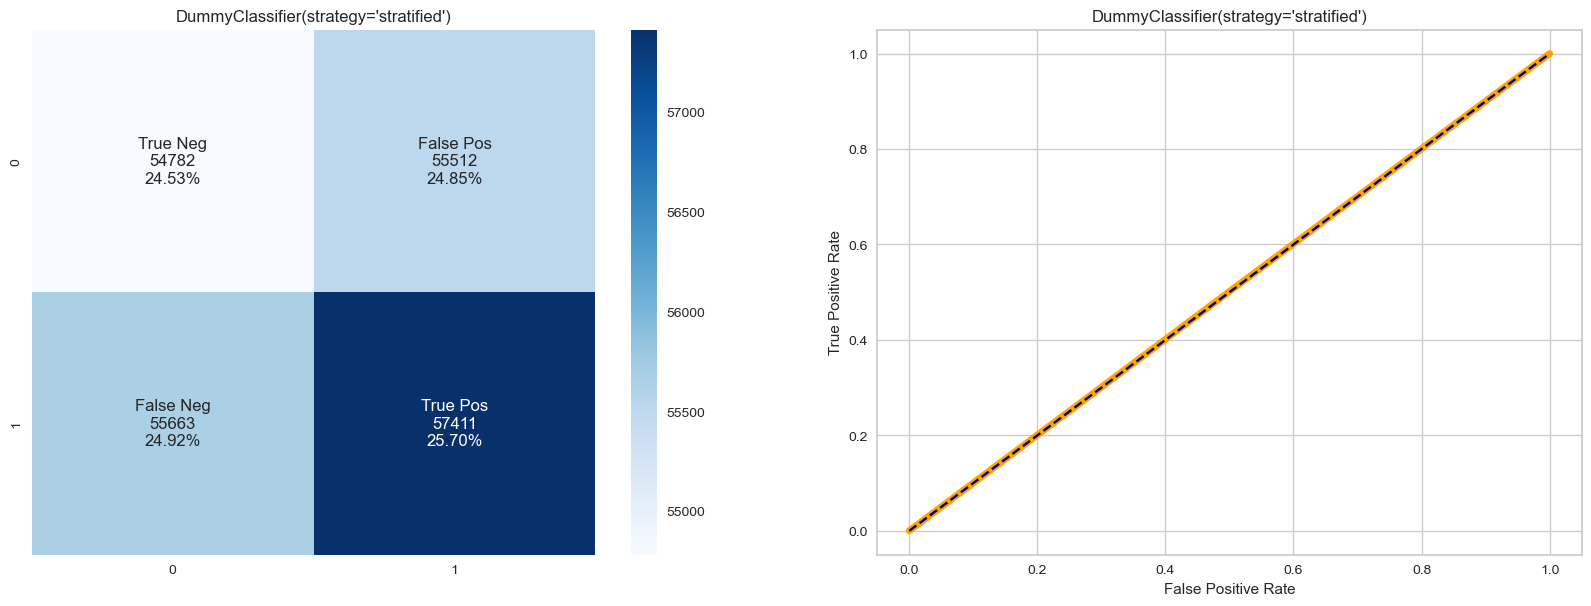

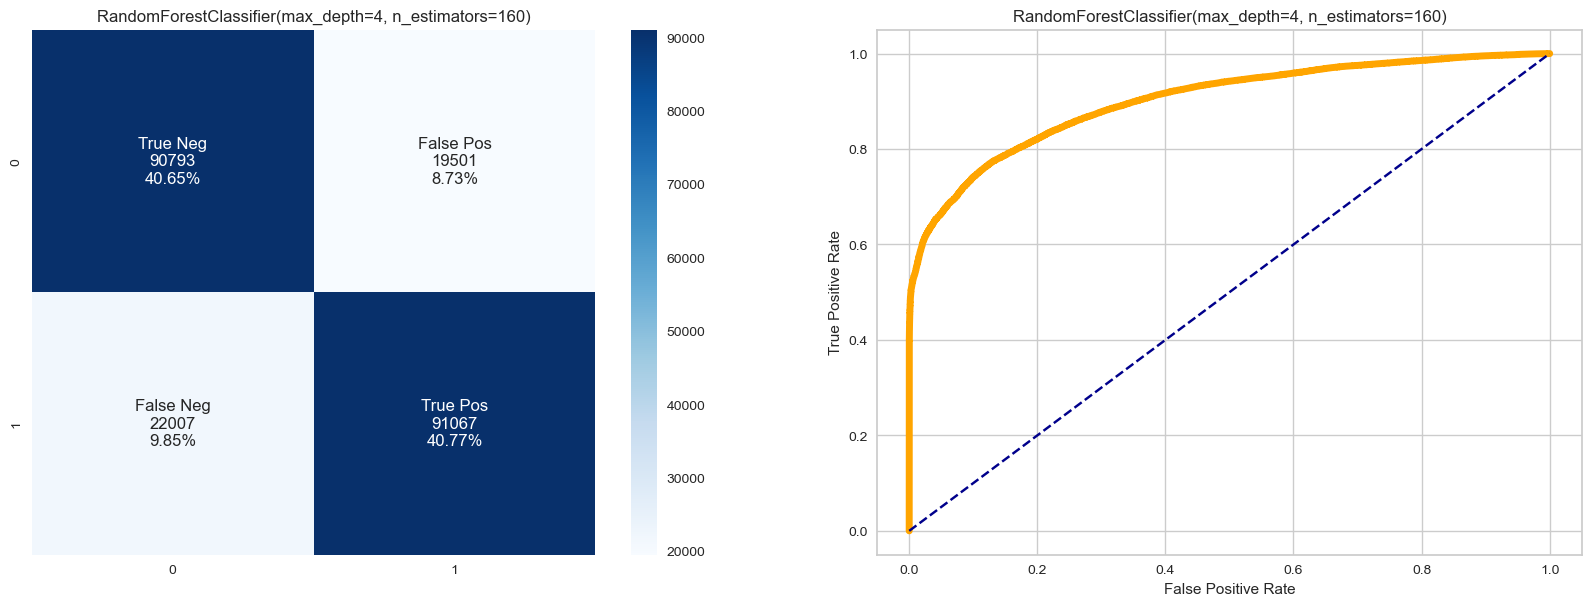

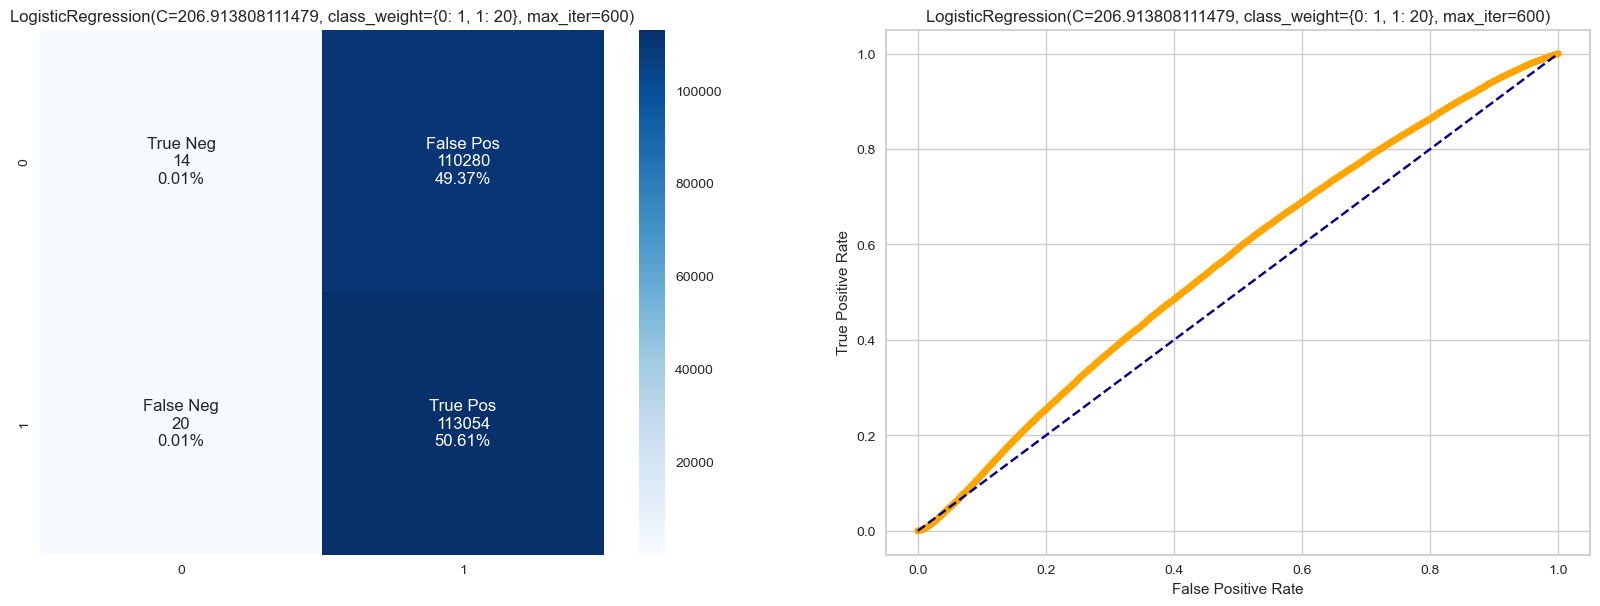

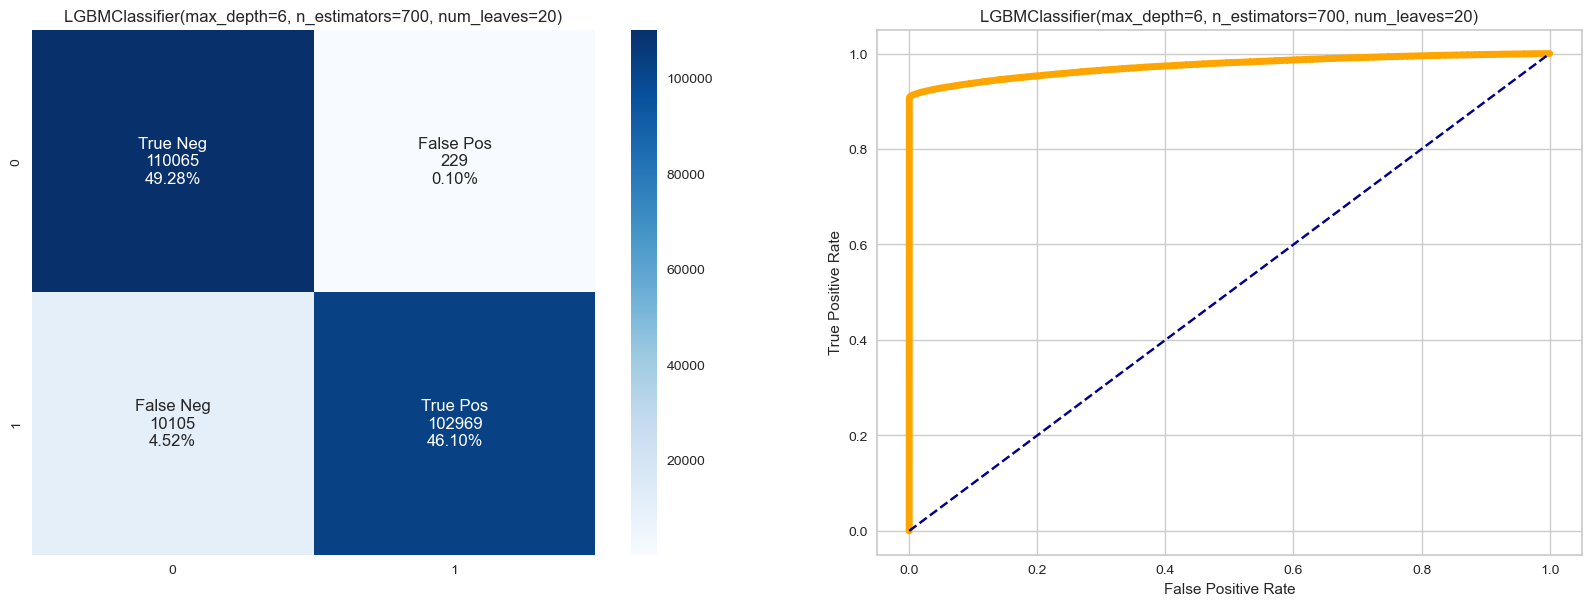

In [55]:
for model in models:   
    model.fit(X_train_1, y_train_1)
    cf_matrix_roc_auc(model, y_test_1, model.predict(X_test_1), model.predict_proba(X_test_1)[:,1])
    

In [56]:
# ESSAI EXCEPTIONNEL Giulio

from sklearn.metrics import roc_curve

dum_model = DummyClassifier(strategy='stratified')
rf_model = RandomForestClassifier(max_depth=4, n_estimators=160)
lr_model = LogisticRegression(C=0.0001, class_weight={0: 1, 1: 20}, max_iter=600)
lgb_model = LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)

#  Pour supporter les charactères JSON spéciaux dans la colonne .
X_test_1 = X_test_1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

dum_model.fit(X_test_1,y_test_1)
rf_model.fit(X_test_1,y_test_1)
lr_model.fit(X_test_1,y_test_1)
lgb_model.fit(X_test_1,y_test_1)

fp_lgb, tp_lgb, treshold_lgb = roc_curve(y_test_1, lgb_model.predict_proba(X_test_1)[:, 1])
fp_rf, tp_rf, treshold_rf = roc_curve(y_test_1, rf_model.predict_proba(X_test_1)[:, 1])
fp_lr, tp_lr, treshold_lr = roc_curve(y_test_1, lr_model.predict_proba(X_test_1)[:, 1])
fp_dum, tp_dum, treshold_dum = roc_curve(y_test_1, dum_model.predict_proba(X_test_1)[:, 1])

In [57]:
# ESSAI EXCEPTIONNEL

from sklearn.metrics import roc_auc_score


auc_score_lgb = roc_auc_score(y_test_1, lgb_model.predict_proba(X_test_1)[:, 1])
auc_score_rf = roc_auc_score(y_test_1, rf_model.predict_proba(X_test_1)[:, 1])
auc_score_lr = roc_auc_score(y_test_1, lr_model.predict_proba(X_test_1)[:, 1])
auc_score_dum = roc_auc_score(y_test_1, dum_model.predict_proba(X_test_1)[:, 1])

lst_auc_score = [("LGBMClassifier", auc_score_lgb),
                ("Random Forest", auc_score_rf),
                ("Logistic Regression", auc_score_lr),
                ("Dummy", auc_score_dum)]

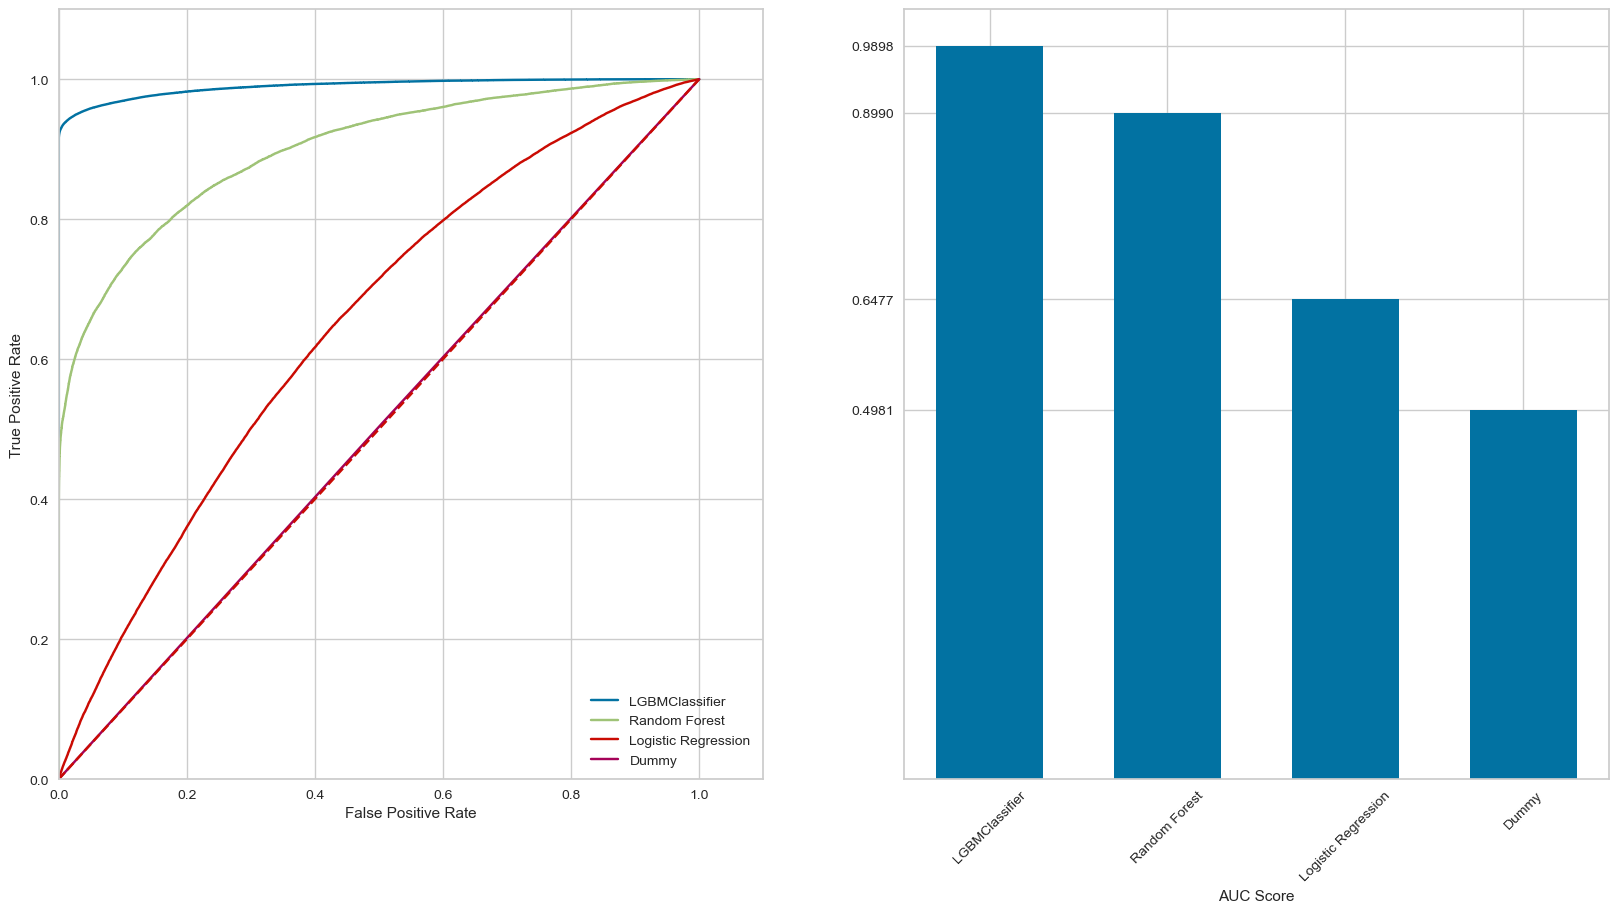

In [58]:
# ESSAI EXCEPTIONNEL

plt.figure(figsize=(20,10))


plt.subplot(1, 2, 1)


plt.plot(fp_lgb, tp_lgb, label="LGBMClassifier")
plt.plot(fp_rf, tp_rf, label="Random Forest")
plt.plot(fp_lr, tp_lr, label="Logistic Regression")
plt.plot(fp_dum, tp_dum, label="Dummy")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(1, 2, 2)

plt.style.use('fivethirtyeight')

labels, ys = zip(*lst_auc_score)

xs = np.arange(len(labels)) 

width = 0.6

plt.bar(xs, ys, width, align='center')

plt.xlabel("AUC Score")
plt.xticks(xs, labels, rotation=45) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.show()

In [59]:
#lgbm = LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)
mon_best_model = mon_model

#  Pour supporter les charactères JSON spéciaux dans la colonne .
X_train_1 = X_train_1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

#lgbm.fit(X_train_1, y_train_1)
mon_best_model.fit(X_train_1, y_train_1)

#roc_auc = roc_auc_score(y_test_1, lgbm.predict_proba(X_test_1)[:,1])
roc_auc = roc_auc_score(y_test_1, mon_best_model.predict_proba(X_test_1)[:,1])
print('Mon meilleur modèle:',mon_best_model)
print('AUC : %0.4f' %roc_auc)
#print(classification_report(y_test, lr.predict(X_test)))

Mon meilleur modèle: LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)
AUC : 0.9742


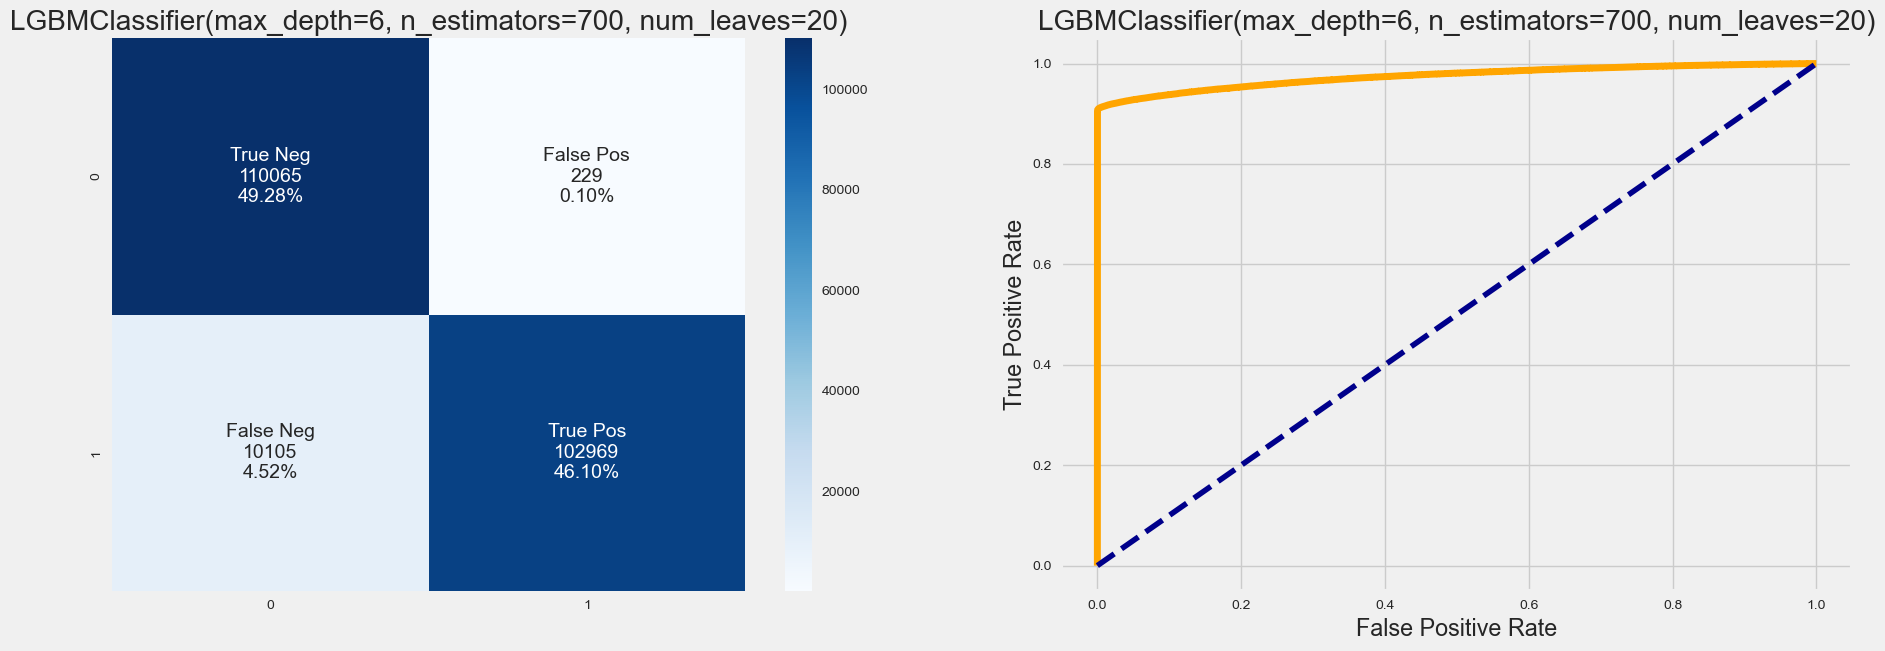

In [61]:
cf_matrix_roc_auc(mon_best_model, y_test_1, mon_best_model.predict(X_test_1), mon_best_model.predict_proba(X_test_1)[:,1])

In [ ]:
# AUTRE lien

In [82]:
'''# build the model
from sklearn.pipeline import make_pipeline, Pipeline

logreg = make_pipeline(
    Preprocessing(numeric_attribute,categoric_attribute), mon_best_model)

# train the model
logreg.fit(X_train, y_train)

# make predictions on the test set
y_pred = logreg.predict(X_test)

# measure accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)'''

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<h2><font color="3337B0">Feature Selection - Recursive Feature Elimination</font></h2>

In [ ]:
'''
scaler = StandardScaler()
def prepare_data(data, scale=True):
  names = data.columns
  if (scale == True):
    scaled_data = scaler.fit_transform(data)
    data = pd.DataFrame(scaled_data, columns=names)
  #X_features = ["median_income", "latitude", "longitude", "housing_median_age", "total_bedrooms", "total_rooms", "population", "households"] 
  y_label = ["median_house_value"]
  X = data[names]
  del X["median_house_value"]
  y = data[y_label]
  x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)
  return x_train,x_test,y_train,y_test
 
x_train, x_test, y_train, y_test = prepare_data(all_data)'''

In [109]:
'''XX_train, XX_test, yy_train, yy_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Data Transformée
preprocessor_fitted = Preprocessing(numeric_attribute,categoric_attribute).fit(X_train)
X_train_transformed = preprocessor_fitted.transform(X_train)

dataset_bis = dataset.copy()

dataset_bis_transformed = preprocessor_fitted.transform(dataset_bis)
dataset_bis_columns = dataset_bis.columns
dataset_bis = pd.DataFrame(dataset_bis_transformed, columns=dataset_bis_columns)'''

In [69]:
'''%%time
start = time.time()
rfecv = RFECV(estimator=mon_model, 
              step=5, 
              cv=StratifiedKFold(5), 
              scoring='roc_auc', 
              verbose=2,
              n_jobs=-1)
rfecv.fit(X_train_1, y_train_1)

print('Time Elapsed: {}'.format(time.time()-start))'''

Fitting estimator with 70 features.
Fitting estimator with 65 features.
Fitting estimator with 60 features.
Fitting estimator with 55 features.
Fitting estimator with 50 features.
Fitting estimator with 45 features.
Fitting estimator with 40 features.
Fitting estimator with 35 features.
Fitting estimator with 30 features.
Fitting estimator with 25 features.
Time Elapsed: 1410.3961980342865
Wall time: 23min 30s


In [70]:
'''print("Nombre optimal de features features : %d" % rfecv.n_features_)
print(" Features sélectionnés: %s" % rfecv.support_[:20])
print("Position des Features : %s" % rfecv.ranking_[:20])'''

Nombre optimal de features features : 20
 Features sélectionnés: [False  True  True  True  True  True  True False False  True False False
 False  True  True False  True False False  True]
Position des Features : [3 1 1 1 1 1 1 5 3 1 4 2 3 1 1 2 1 6 6 1]


In [75]:
#XX_train = pd.DataFrame(X_train_1)
#XX_test = pd.DataFrame(X_test_1)

In [173]:
#X_train_1.shape

(335366, 70)

In [83]:
#X_test_1.shape

(223703, 70)

In [84]:
#data_train = pd.concat([XX_train , XX_test])

In [85]:
'''ranking = pd.DataFrame({'Features': data_train.columns})
ranking['RANK'] = np.asarray(rfecv.ranking_)
ranking.sort_values('RANK', inplace=True)

features_selection = ranking[ranking.RANK == 1]['Features'].to_list()
print(len(features_selection))
print(features_selection)'''

20
['13', '28', '16', '20', '14', '25', '29', '21', '22', '9', '23', '24', '6', '5', '4', '3', '2', '1', '27', '19']


<h4> SABINE    On teste le feature_importance  avec SHAP

<h2><font color="3337B0">Feature Selection - Recursive Feature Elimination</font></h2>

In [62]:
def important_feature_df (classifier, X) :
    X_importance = X
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_importance)
    vals= np.abs(shap_values).mean(0)
    x = pd.DataFrame(X)
    feature_importance = pd.DataFrame(list(zip(x.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
    return feature_importance

In [63]:
def feature_importance_graphic(classifier, X):
    X_importance = X
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_importance)
    shap.summary_plot(shap_values[1], X_importance)
    shap.summary_plot(shap_values, X_importance, plot_type='bar')
    #shap.force_plot(explainer.expected_value[1], shap_values[1], X)
    
    return 

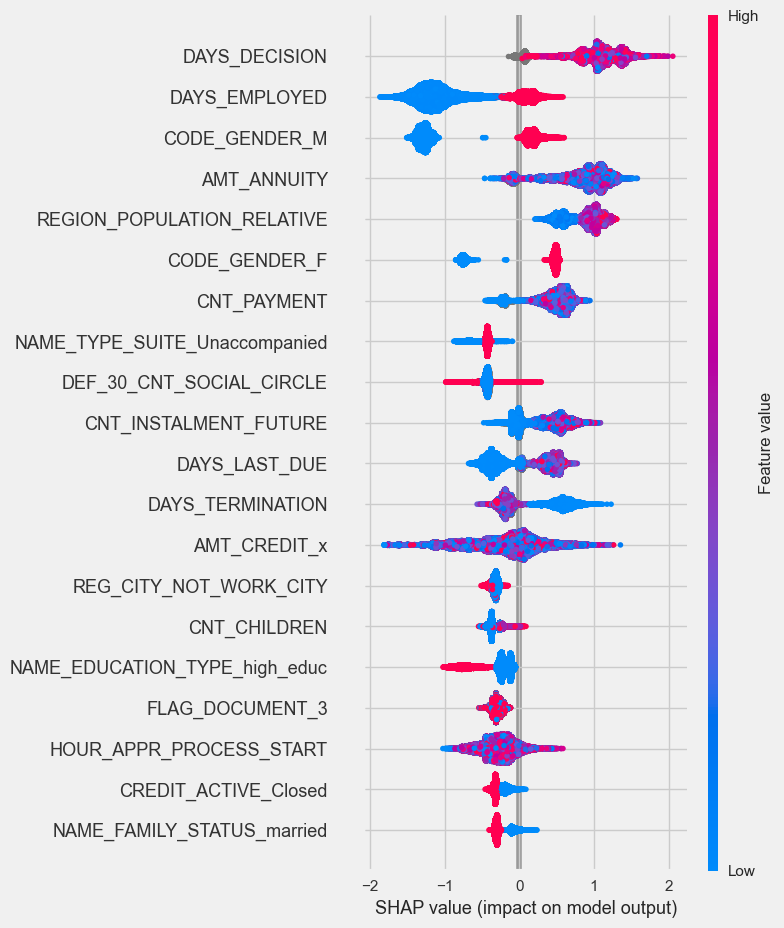

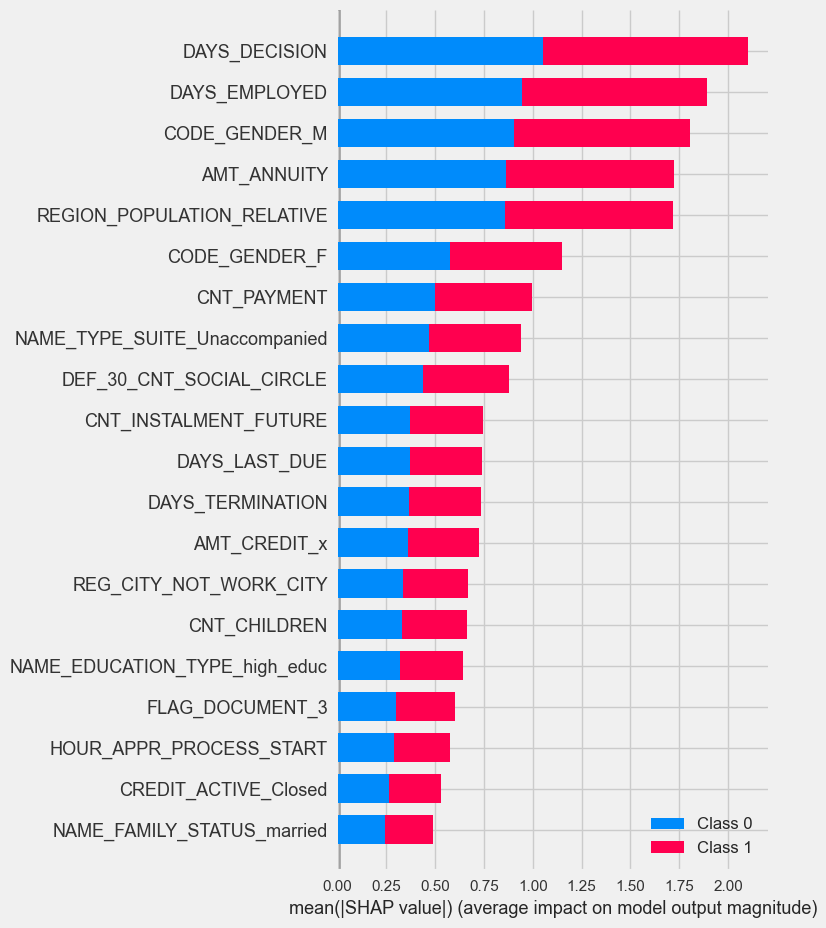

In [64]:
feature_importance_graphic(mon_model,pd.get_dummies(features_sample))

In [161]:
# shap_values(pd.get_dummies(features_sample))

NameError: name 'shap_values' is not defined

In [165]:
'''def global_shap_importance(model, X):
    """ Return a dataframe containing the features sorted by Shap importance
    Parameters
    ----------
    model : The tree-based model 
    X : pd.Dataframe
         training set/test set/the whole dataset ... (without the label)
    Returns
    -------
    pd.Dataframe
        A dataframe containing the features sorted by Shap importance
    """
    explainer = shap.Explainer(model)
    shap_values = explainer(X)
    cohorts = {"": shap_values}
    cohort_labels = list(cohorts.keys())
    cohort_exps = list(cohorts.values())
    for i in range(len(cohort_exps)):
        if len(cohort_exps[i].shape) == 2:
            cohort_exps[i] = cohort_exps[i].abs.mean(0)
    features = cohort_exps[0].data
    feature_names = cohort_exps[0].feature_names
    values = np.array([cohort_exps[i].values for i in range(len(cohort_exps))])
    feature_importance = pd.DataFrame(
        list(zip(feature_names, sum(values))), columns=['features', 'importance'])
    feature_importance.sort_values(
        by=['importance'], ascending=False, inplace=True)
    return feature_importance'''

In [65]:
# Nous allons afficher les features importants et leur

explainer = shap.TreeExplainer(mon_model)  
shap_values = explainer.shap_values(pd.get_dummies(features_sample))


def shap_feature_ranking(data, shap_values, columns=[]):
    if not columns: columns = data.columns.tolist()     # If columns are not given, take all columns
    
    c_idxs = []
    for column in columns: c_idxs.append(data.columns.get_loc(column))  # Get column locations for desired columns in given dataframe
    if isinstance(shap_values, list):   # If shap values is a list of arrays (i.e., several classes)
        means = [np.abs(shap_values[class_][:, c_idxs]).mean(axis=0) for class_ in range(len(shap_values))]  # Compute mean shap values per class 
        shap_means = np.sum(np.column_stack(means), 1)  # Sum of shap values over all classes 
    else:                               # Else there is only one 2D array of shap values
        assert len(shap_values.shape) == 2, 'Expected two-dimensional shap values array.'
        shap_means = np.abs(shap_values).mean(axis=0)
    
    # Put into dataframe along with columns and sort by shap_means, reset index to get ranking
    df_ranking = pd.DataFrame({'feature': columns, 'mean_shap_value': shap_means}).sort_values(by='mean_shap_value', ascending=False).reset_index(drop=True)
    df_ranking.index += 1
    return df_ranking

In [66]:
shap_feature_ranking(pd.get_dummies(features_sample), shap_values, columns=[])

,feature,mean_shap_value
1,DAYS_DECISION,2.099835
2,DAYS_EMPLOYED,1.892771
3,CODE_GENDER_M,1.806918
4,AMT_ANNUITY,1.721777
5,REGION_POPULATION_RELATIVE,1.718024
...,...,...
66,CODE_GENDER_XNA,0.000000
67,CODE_REJECT_REASON_SYSTEM,0.000000
68,NAME_INCOME_TYPE_working,0.000000
69,NAME_INCOME_TYPE_not_working,0.000000


In [65]:
#dola = shap_feature_ranking(pd.get_dummies(features_sample), shap_values, columns=[])

In [67]:
Mes_best_features = shap_feature_ranking(pd.get_dummies(features_sample), shap_values, columns=[])['feature'][:20].to_list()

In [68]:
Mes_best_features

['DAYS_DECISION',
 'DAYS_EMPLOYED',
 'CODE_GENDER_M',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'CODE_GENDER_F',
 'CNT_PAYMENT',
 'NAME_TYPE_SUITE_Unaccompanied',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'CNT_INSTALMENT_FUTURE',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'AMT_CREDIT_x',
 'REG_CITY_NOT_WORK_CITY',
 'CNT_CHILDREN',
 'NAME_EDUCATION_TYPE_high_educ',
 'FLAG_DOCUMENT_3',
 'HOUR_APPR_PROCESS_START',
 'CREDIT_ACTIVE_Closed',
 'NAME_FAMILY_STATUS_married']

In [ ]:
'''feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)'''

In [70]:
Xtrain_MesBestFeat = X_train_1[Mes_best_features]
Xtrain_MesBestFeat

,DAYS_DECISION,DAYS_EMPLOYED,CODE_GENDER_M,AMT_ANNUITY,REGION_POPULATION_RELATIVE,CODE_GENDER_F,CNT_PAYMENT,NAME_TYPE_SUITE_Unaccompanied,DEF_30_CNT_SOCIAL_CIRCLE,CNT_INSTALMENT_FUTURE,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_CREDIT_x,REG_CITY_NOT_WORK_CITY,CNT_CHILDREN,NAME_EDUCATION_TYPE_high_educ,FLAG_DOCUMENT_3,HOUR_APPR_PROCESS_START,CREDIT_ACTIVE_Closed,NAME_FAMILY_STATUS_married
0,-0.013210,0.159321,1.000000,-0.481075,0.908077,0.000000,-1.055556,1.000000,0.000000,-1.219048,-0.005764,-0.355952,-0.315104,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
1,0.019815,148.179943,0.000000,0.695121,0.013453,1.000000,-0.380952,1.000000,0.000000,-0.457143,0.849054,0.360651,0.299766,0.000000,0.000000,1.000000,-1.000000,1.750000,1.000000,1.000000
2,-2.372922,-1.360696,0.000000,-0.609616,0.000000,1.000000,-0.666667,1.000000,0.000000,0.000000,-0.011780,0.474257,0.796007,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000
3,0.350648,148.179943,0.000000,0.606873,-0.900895,1.000000,2.777778,1.000000,0.000000,0.160401,0.993138,0.481436,0.299766,0.000000,0.000000,1.000000,-1.000000,0.500000,1.000000,0.000000
4,-0.000091,148.179943,0.000000,0.069770,-0.422576,1.000000,2.555556,1.000000,0.000000,6.780952,1.489211,0.897307,-0.092648,0.000000,0.000000,0.000000,0.000000,-0.250000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335634,0.148140,-0.306087,1.000000,0.606403,0.598475,0.000000,1.411550,1.000000,0.389233,1.822312,-0.006023,-0.356169,0.521885,0.610767,0.610767,0.000000,0.000000,0.333850,0.389233,0.610767
335635,0.439277,45.985114,0.000000,-0.232885,0.227121,1.000000,0.065613,0.690592,0.000000,0.430706,1.184210,0.641656,-0.508261,0.690592,0.000000,0.000000,-0.309408,0.285889,0.000000,1.000000
335636,-0.189519,0.252356,0.762285,-0.428228,0.390478,0.237715,-0.095323,1.000000,0.000000,0.457751,0.751064,0.278514,-0.173789,0.762285,0.000000,0.237715,0.000000,-1.178286,0.000000,1.000000
335637,0.083273,-0.615824,0.316631,-0.511001,-0.220815,0.683369,-0.327766,1.000000,0.633262,0.487685,1.672785,1.051193,0.009789,0.000000,1.316631,0.000000,0.000000,0.116738,1.000000,0.316631


In [72]:
# Appliquons notre modèle sur les best features

Xtrain_BestFeat = X_train_1[Mes_best_features]
Xtest_BestFeat = X_test_1[Mes_best_features]
mon_model_Xtrain_BestFeat = mon_model

In [73]:
mon_model_Xtrain_BestFeat.fit(Xtrain_BestFeat, y_train_1)

LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)

In [ ]:
'''# Store the model into a pickle file
filename = '../bin/xgboostModel.pkl'
joblib.dump(grid.best_estimator_, filename)'''

In [74]:
# Enregistrons le modèle

pickle.dump(mon_model_Xtrain_BestFeat , open('model_7.pkl','wb'))

In [75]:
roc_auc_new = roc_auc_score(y_test_1, mon_model_Xtrain_BestFeat.predict_proba(Xtest_BestFeat)[:,1])
#print('Mon meilleur modèle:',mon_best_model)
print('AUC : %0.4f' %roc_auc_new)

AUC : 0.9707


In [ ]:
'''mon_best_model = mon_model

#  Pour supporter les charactères JSON spéciaux dans la colonne .
X_train_1 = X_train_1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

#lgbm.fit(X_train_1, y_train_1)
mon_best_model.fit(X_train_1, y_train_1)

#roc_auc = roc_auc_score(y_test_1, lgbm.predict_proba(X_test_1)[:,1])
roc_auc = roc_auc_score(y_test_1, mon_best_model.predict_proba(X_test_1)[:,1])
print('Mon meilleur modèle:',mon_best_model)
print('AUC : %0.4f' %roc_auc)'''

<h4> SABINE     FIN    du test du feature_importance

# ***

In [62]:
boost = lgbm_model.booster_
print('Feature names:',boost.feature_name())

NameError: name 'lgbm_model' is not defined

In [113]:
feature_importances = lgbm_model.feature_importances_
print("Shape :", feature_importances.shape)
print(feature_importances)

Shape : (70,)
[146 701 706 818 614 480  74  97  98 815  96 224 124 638 553 225 300  51
  41 562 449 441 431 461 589 572 235 339 426 441 179  45  18  71  95   0
  23  28   0   3  29  11 125   0   1 101  22  63  56  52  32  90  10  65
  29  69   8   4  32   8  11   5   2   0  29   4  73  66  74   2]


In [ ]:
'''def display_feat_imp_rforest(rforest):
  feat_imp = rforest.feature_importances_
  df_featimp = pd.DataFrame(feat_imp, columns = {"Feature Importance"})
  df_featimp["Feature Name"] = x_train.columns
  df_featimp = df_featimp.sort_values(by="Feature Importance", ascending=False)
  print(df_featimp)
  df_featimp.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red")
 
display_feat_imp_rforest(model_2_rforest)'''

In [125]:
X_test_1_map = X_test_1.copy()
X_test_1_map.columns = pd.get_dummies(features_sample).columns
X_test_1_map.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3',
       'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_BALANCE', 'AMT_PAYMENT_CURRENT',
       'SK_DPD_x', 'SK_DPD_DEF', 'DAYS_INSTALMENT_delay',
       'AMT_INSTALMENT_delta', 'AMT_ANNUITY', 'AMT_CREDIT_y',
       'AMT_DOWN_PAYMENT', 'DAYS_DECISION', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD_y', 'NAME_CONTRACT_TYPE_Cash loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'CODE_GENDER_XNA', 'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE

In [133]:
'''def display_feat_imp_rforest(rforest):
  feat_imp = rforest.feature_importances_
  df_featimp = pd.DataFrame(feat_imp, columns = {"Feature Importance"})
  df_featimp["Feature Name"] = X_train_1_map.columns
  df_featimp = df_featimp.sort_values(by="Feature Importance", ascending=False)
  print(df_featimp)
  df_featimp.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red")
 
display_feat_imp_rforest(lgbm_model)'''

NotFittedError: No feature_importances found. Need to call fit beforehand.

In [121]:
X_train_1_map = X_train_1.copy()
X_train_1_map.columns = pd.get_dummies(features_sample).columns

In [137]:

X_train_1_map = X_train_1_map.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [138]:
X_train_1_map.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3',
       'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_BALANCE', 'AMT_PAYMENT_CURRENT',
       'SK_DPD_x', 'SK_DPD_DEF', 'DAYS_INSTALMENT_delay',
       'AMT_INSTALMENT_delta', 'AMT_ANNUITY', 'AMT_CREDIT_y',
       'AMT_DOWN_PAYMENT', 'DAYS_DECISION', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD_y', 'NAME_CONTRACT_TYPE_Cashloans',
       'NAME_CONTRACT_TYPE_Revolvingloans', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'CODE_GENDER_XNA', 'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Groupofpeople', 'NAME_TYPE_SUITE_Other_A',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spo

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

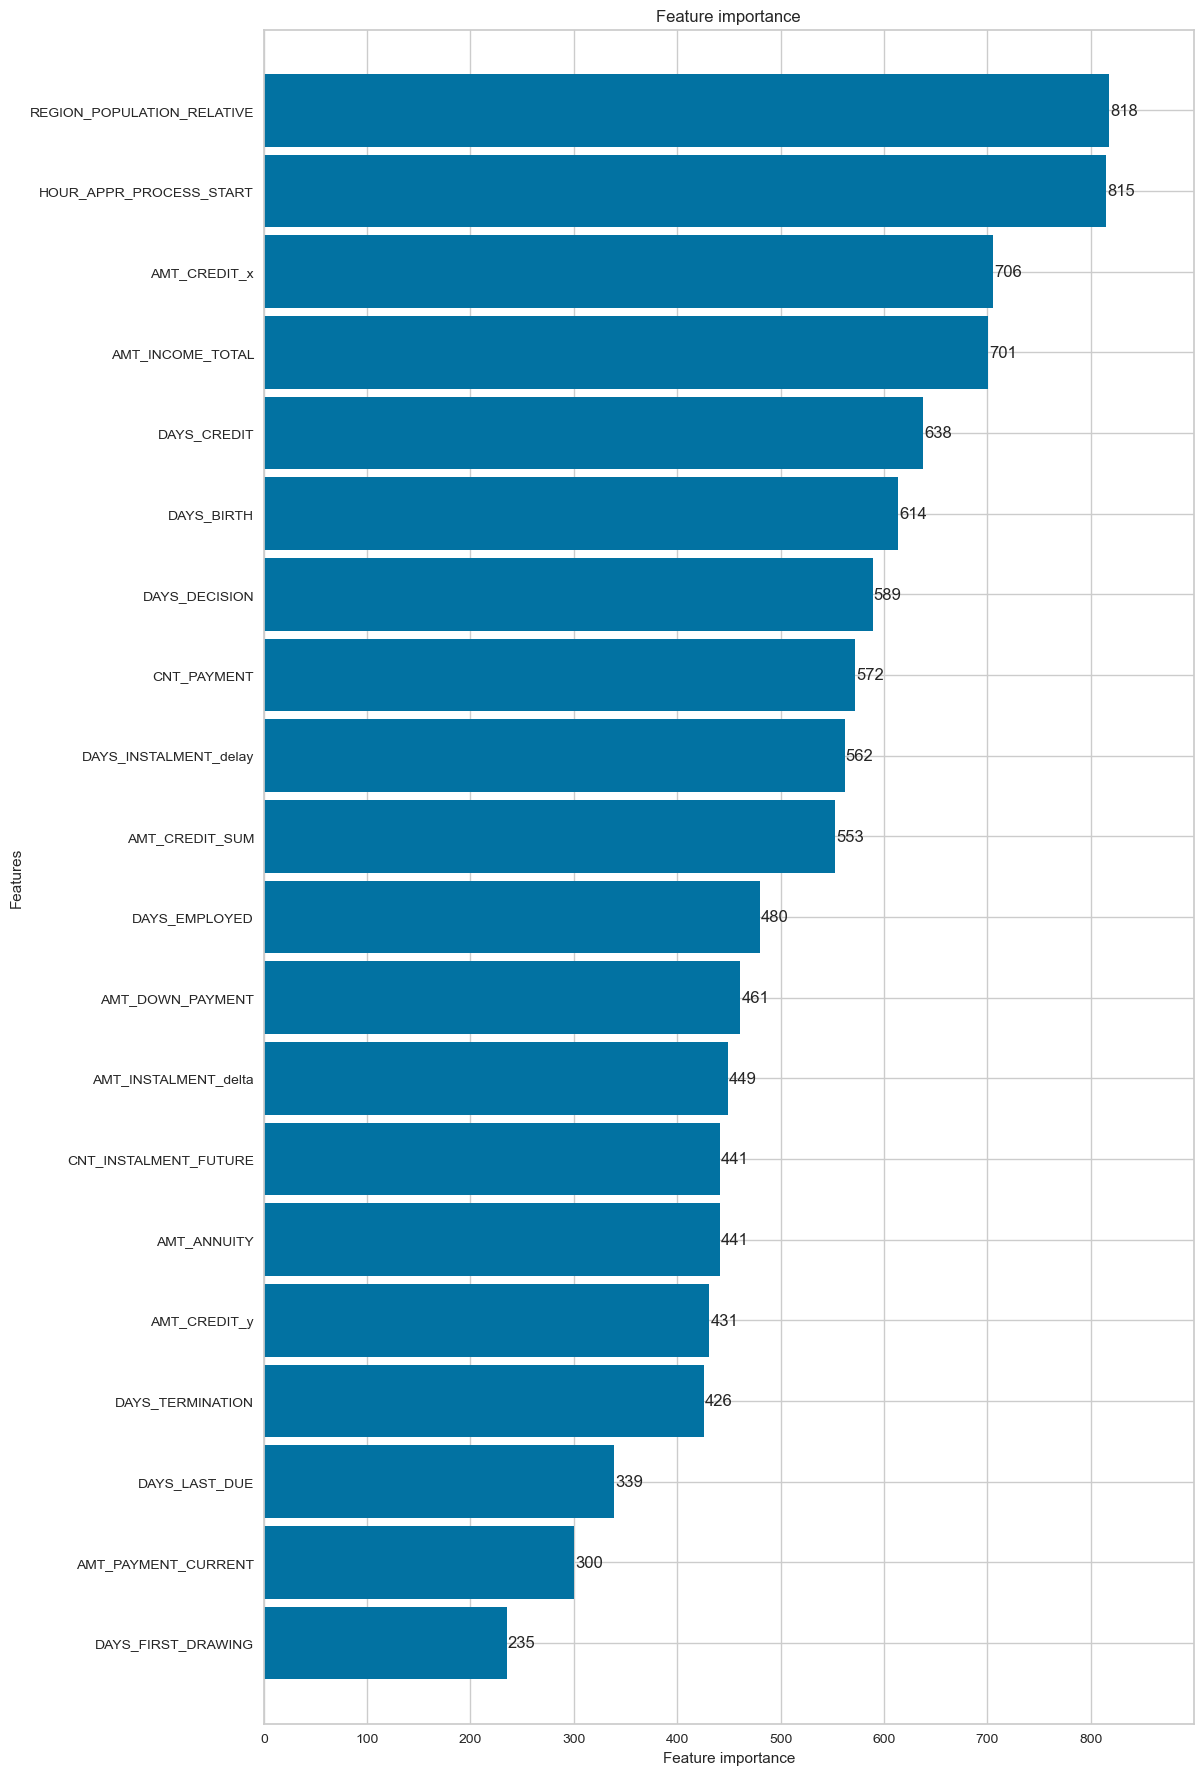

In [139]:
import lightgbm

from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)

lgbm_model.fit(X_train_1_map, y_train_1)

y_pred_1 = lgbm_model.predict(X_test_1_map)

plt.rcParams["figure.figsize"] = (12, 22)

lightgbm.plot_importance(lgbm_model, max_num_features = 20, height=.9)

In [146]:
haha_importances = pd.Series(lgbm_model.feature_importances_, index = X_train_1_map.columns).sort_values(ascending = False)
haha_importances

REGION_POPULATION_RELATIVE       818
HOUR_APPR_PROCESS_START          815
AMT_CREDIT_x                     706
AMT_INCOME_TOTAL                 701
DAYS_CREDIT                      638
                                ... 
NAME_INCOME_TYPE_working           1
CODE_REJECT_REASON_VERIF           0
NAME_INCOME_TYPE_not_working       0
NAME_TYPE_SUITE_Groupofpeople      0
CODE_GENDER_XNA                    0
Length: 70, dtype: int32

In [159]:
haha_importances.index.to_list()[:20]

['REGION_POPULATION_RELATIVE',
 'HOUR_APPR_PROCESS_START',
 'AMT_CREDIT_x',
 'AMT_INCOME_TOTAL',
 'DAYS_CREDIT',
 'DAYS_BIRTH',
 'DAYS_DECISION',
 'CNT_PAYMENT',
 'DAYS_INSTALMENT_delay',
 'AMT_CREDIT_SUM',
 'DAYS_EMPLOYED',
 'AMT_DOWN_PAYMENT',
 'AMT_INSTALMENT_delta',
 'AMT_ANNUITY',
 'CNT_INSTALMENT_FUTURE',
 'AMT_CREDIT_y',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'AMT_PAYMENT_CURRENT',
 'DAYS_FIRST_DRAWING']

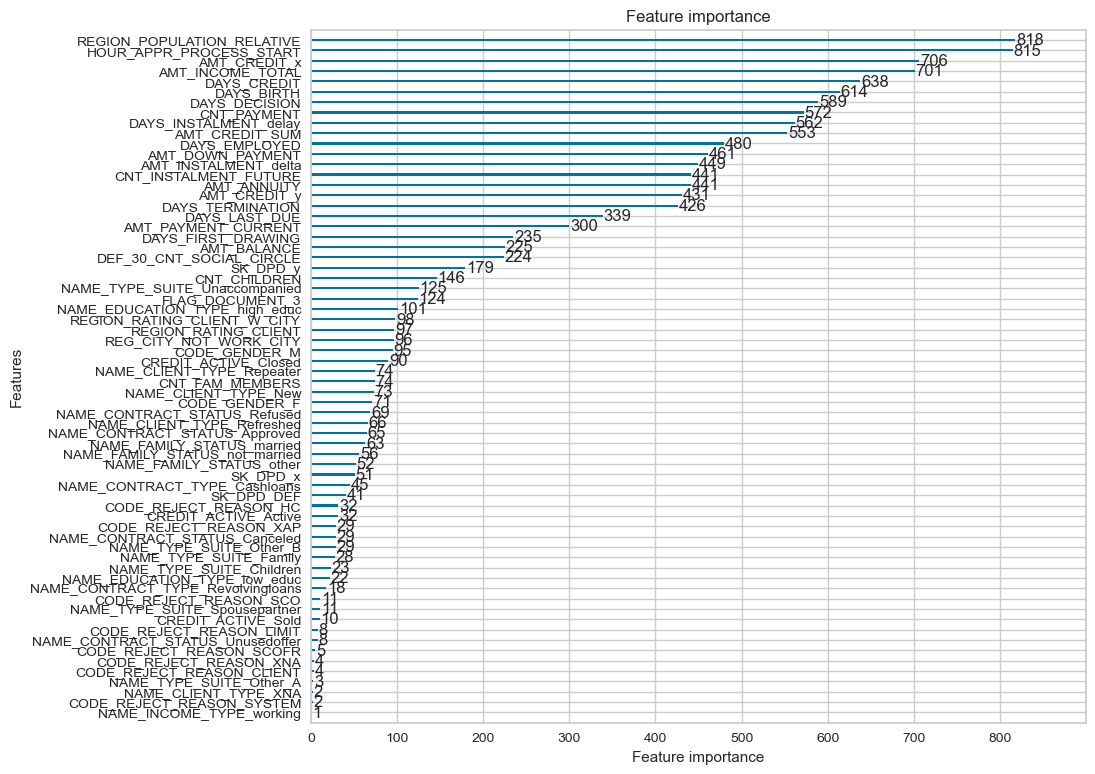

In [140]:
'''from lightgbm import LGBMClassifier, plot_importance 

lgbm_model2 =  LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)

lgbm_model2.fit(X_train_1_map, y_train_1)

y_pred_2 = lgbm_model2.predict(X_test_1_map)        

plot_importance(lgbm_model2, figsize=(10, 9));'''

# ***

# AHAMEG debut 2   Tenir compte?

In [31]:
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))


def generate_model_report(Model, y_actual, y_predicted):
    
    precision, recall, fscore, support = precision_recall_fscore_support (y_actual, y_predicted) #score
    print("")
    print("Model :", Model)
    print("==============================================================================")
    print('Precision : {}'.format(precision))
    print('recall : {}'.format(recall))
    print('fscore : {}'.format(fscore))
    print('support : {}'.format(support))
    pass    

# Fonction d'évaludation des modèles (Learning Curve)
def evaluation (model , X_train, y_train,X_test,cv,width_fig,height_fig,scoring):
    
        model.fit(X_train, y_train)
        ypred = model.predict(X_test)
        N, train_score, val_score = learning_curve(model, X_train, y_train, cv=cv, scoring=scoring, 
                                               train_sizes=np.linspace(0.1,1,10))
        plt.figure(figsize=(width_fig,height_fig))
        plt.plot(N,-train_score.mean(axis=1), label = "Train score")
        plt.plot(N,-val_score.mean(axis=1), label = "Val score")
        plt.title("Learning Curve :")
        plt.legend()
        plt.show()

In [32]:
print("                     Performance des modèles sélectionnés ") 
print("                    =====================================")
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['models','fpr','tpr','F_beta_Score','fprOpt','tprOpt']) 
y_prediction=[]
conf_mat=[]
features=[]
start_time_models = time.time()
elapsed_time_all_models=0
fbeta_int=0
i=0
for Model in (model):
    nom_model=Names[i]
    start_time_model = time.time()
    
    # summarize performance
    prob = Model.predict_proba(X_test_1)
    y_pred= Model.predict(X_test_1)
    y_prediction.append(y_pred)
    prob = prob[:, 1]
    generate_model_report(Model, y_test_1, y_pred)
    
    #ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_1, prob)
    
    # Calculate the G-mean
    gmean=np.sqrt(tpr*(1-fpr))
    
    # Find the optimal threshold
    index = np.argmax(gmean)
    thresholdOpt = round(thresholds[index], ndigits = 4)
    gmeanOpt = round(gmean[index], ndigits = 4)
    fprOpt = round(fpr[index], ndigits = 4)
    tprOpt = round(tpr[index], ndigits = 4)
    
    # Auc Score
    #auc=auc(fpr, tpr, reorder=True)
    auc=roc_auc_score(y_test_1, prob)
    
    # F-beta score : 
    fbeta= fbeta_score(y_test_1, y_pred, beta=2.775)
    
    # Confusion Matrix
    cm=confusion_matrix(y_test_1, y_pred)
    conf_mat.append(cm)
    print("")
    print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
    print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))
    print("")
    print("Confusion Matrix :\n", cm)
    print("=================")
    print("")
    # Display results
    result_table = result_table.append({'models':Model.__class__.__name__, 
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'fprOpt':fprOpt,
                                        'tprOpt':tprOpt,
                                        #'auc':auc,
                                        'F_beta_Score':fbeta,
                                        'threshold':thresholdOpt}, ignore_index=True)
    
    elapsed_time_model =np.round((time.time() - start_time_model)/3600,2)
    print(Model,": 100% , Done in :",elapsed_time_model, "Hours")
    print("")
    # Save best model performances  
    ############## Sauvegarde du modèle le plus performant (RMSE la plus basse) ####################  
    if fbeta > fbeta_int :
        fbeta_int = fbeta
        final_model = Model   # Attribution du modèle entraîné à une variable
        Model_name=nom_model
        Optimal_threshold=thresholdOpt
    i=i+1

                     Performance des modèles sélectionnés 

Model : DummyClassifier(strategy='stratified')
Precision : [0.49424975 0.5064437 ]
recall : [0.49481882 0.50587465]
fscore : [0.49453412 0.50615901]
support : [110303 113028]

Best Threshold: 1.0 with G-Mean: 0.5013
FPR: 0.5057, TPR: 0.5083

Confusion Matrix :
 [[54580 55723]
 [55850 57178]]

DummyClassifier(strategy='stratified') : 100% , Done in : 0.0 Hours


Model : RandomForestClassifier(max_depth=4, n_estimators=160)
Precision : [0.7987707  0.80019353]
recall : [0.79408538 0.80477404]
fscore : [0.79642115 0.80247725]
support : [110303 113028]

Best Threshold: 0.5165 with G-Mean: 0.8085
FPR: 0.1533, TPR: 0.772

Confusion Matrix :
 [[87590 22713]
 [22066 90962]]

RandomForestClassifier(max_depth=4, n_estimators=160) : 100% , Done in : 0.0 Hours


Model : LogisticRegression(C=0.00026366508987303583, class_weight={0: 1, 1: 20},
                   max_iter=600)
Precision : [0.5        0.50610185]
recall : [1.72252795e-04 9.998

# mod AHAMEG fin 2

# Un peu de SABINE  ne compte pas 

In [33]:
rf_model_estimator = RandomForestClassifier(max_depth=4, n_estimators=160)

In [34]:
lgbm_model_estimator = lgb.LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)

In [35]:
def model_trained (best_classifier, X, y):
    clf = best_classifier.fit(X,y)
    best_score = best_classifier.score(X,y)
    return clf,best_score    

In [36]:
rf_model,rf_score = model_trained (rf_model_estimator, X_train_smtomek, y_train_smtomek)

In [37]:
rf_score

0.7976597943979243

In [38]:
rf_model

RandomForestClassifier(max_depth=4, n_estimators=160)

In [39]:
lgbm_model,lgbm_score = model_trained (lgbm_model_estimator, X_train_smtomek, y_train_smtomek)

In [40]:
lgbm_score

0.9567288358251638

In [1]:
lgbm_model

NameError: name 'lgbm_model' is not defined

In [42]:
print("                     Performance des modèles sélectionnés ") 
print("                    =====================================")

print(" ")
best_score = 0
best_model = []
rf_lgbm_model_estimator = [rf_model_estimator,lgbm_model_estimator]
for delmot in rf_lgbm_model_estimator:
    le_model,le_score = model_trained (delmot, X_train_smtomek, y_train_smtomek)
    print("Le modèle :", le_model)
    print("Le score :", le_score)
    if le_score > best_score:
        best_score = le_score
        best_model.clear()
        best_model.append(le_model)
    print("==============================================================================")
    print(" ")
notre_model = best_model[0]
print("Le meilleur modèle est : {} ".format(notre_model))   

                     Performance des modèles sélectionnés 
 
Le modèle : RandomForestClassifier(max_depth=4, n_estimators=160)
Le score : 0.8001114099917485
 
Le modèle : LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)
Le score : 0.9567288358251638
 
Le meilleur modèle est : LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20) 


<h4>Export data to dashbord

In [ ]:
# save the model to disk
#filename = 'classifier_lgbm_model.sav'
filename = 'notre_model_classifier.sav'
pickle.dump(notre_model, open(filename, 'wb'))

In [ ]:
# save the preprocessor to disk
filename = 'preprocessor.sav'
pickle.dump(preprocessor_fitted, open(filename, 'wb'))

#   Un peu de SABINE  ne compte pas   FIN FIN FIN